In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [15]:
df=pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
y=df['math score']
X=df.drop(columns='math score',axis=1)

In [19]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [20]:
num_feat=X.select_dtypes(exclude="object").columns
col_feat=X.select_dtypes(include="object").columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
ohencode=OneHotEncoder()
stscale=StandardScaler()
ct=ColumnTransformer(
    [
        ("StandardScaler",stscale,num_feat),("OneHotEncoder",ohencode,col_feat)
    ]
)
X=ct.fit_transform(X)

In [21]:
X.shape

(1000, 19)

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
def evaluate_model(true,predicted):
    # Calculate the accuracy of the model
    mse=mean_squared_error(true,predicted)
    mae=mean_absolute_error(true,predicted)
    r2s=r2_score(true,predicted)
    rmse=np.sqrt(mse)
    return mae ,rmse ,r2s

In [ ]:
models={
    "LinearRegression":LinearRegression(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "SVR":SVR(),
    "catboost":CatBoostRegressor(),
    "xgboost":XGBRegressor()
}
models_list = list(models.keys())
r2_list=[]
for model in models_list:
    model_name = models[model]
    model_name.fit(X_train, y_train)
    y_train_pred = model_name.predict(X_train)
    y_test_pred = model_name.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(f'model {model}')
    print(f'Train MAE: {model_train_mae:.2f}, Train RMSE:{model_test_rmse:.2f},Train R2: {model_train_r2:.2f}')
    print(f'Test MAE: {model_test_mae:.2f}, Test RMSE:{model_test_rmse:.2f},Test R2: {model_test_r2:.2f}')
    r2_list.append(model_test_r2)



model LinearRegression
Train MAE: 4.27, Train RMSE:5.40,Train R2: 0.87
Test MAE: 4.22, Test RMSE:5.40,Train R2: 0.88
model DecisionTreeRegressor
Train MAE: 0.02, Train RMSE:8.24,Train R2: 1.00
Test MAE: 6.54, Test RMSE:8.24,Train R2: 0.72
model Lasso
Train MAE: 5.21, Train RMSE:6.52,Train R2: 0.81
Test MAE: 5.16, Test RMSE:6.52,Train R2: 0.83
model Ridge
Train MAE: 4.26, Train RMSE:5.39,Train R2: 0.87
Test MAE: 4.21, Test RMSE:5.39,Train R2: 0.88
model SVR
Train MAE: 4.87, Train RMSE:8.13,Train R2: 0.81
Test MAE: 5.40, Test RMSE:8.13,Train R2: 0.73
Learning rate set to 0.039525
0:	learn: 14.5987177	total: 147ms	remaining: 2m 26s
1:	learn: 14.2251886	total: 150ms	remaining: 1m 14s
2:	learn: 13.8866124	total: 152ms	remaining: 50.4s
3:	learn: 13.5235688	total: 158ms	remaining: 39.4s
4:	learn: 13.1887021	total: 165ms	remaining: 32.9s
5:	learn: 12.9124226	total: 168ms	remaining: 27.9s
6:	learn: 12.6000335	total: 171ms	remaining: 24.2s
7:	learn: 12.3299057	total: 173ms	remaining: 21.5s
8:	le

In [29]:
lin=LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)


 Accuracy of the model is 88.02


Text(0, 0.5, 'Predicted Values')

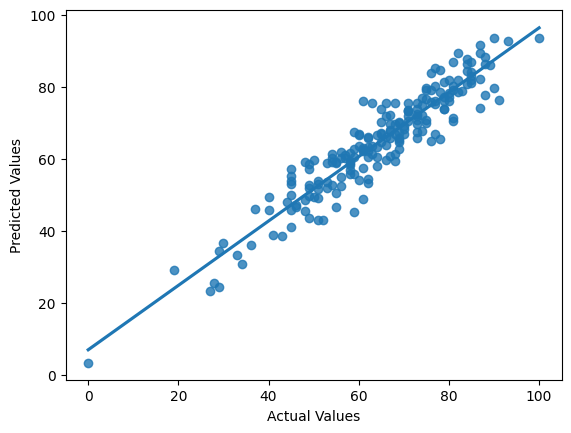

In [33]:
sns.regplot(x=y_test,y=y_pred,ci=23)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
